In [1]:
from mpl_toolkits import mplot3d

In [65]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import numpy as np
import pandas as pd

from matplotlib.animation import FuncAnimation
from matplotlib.path import Path
from matplotlib import rc

import json
from collections import defaultdict
from statistics import median

In [3]:
purchased_itemGamma_dict = np.load('data/complete_itemGamma.npy').item()
played_itemGamma_dict = np.load('data/complete_played_itemGamma.npy').item()

with open('data/items_meta_data.json', 'r') as data:
    games_dict = json.load(data)

In [4]:
genres_list = set()
for game in games_dict.values():
    if 'genres' in game:
        for genre in game['genres']:
            genres_list.add(genre)
genres_list

{'Accounting',
 'Action',
 'Adventure',
 'Animation &amp; Modeling',
 'Audio Production',
 'Casual',
 'Design &amp; Illustration',
 'Early Access',
 'Education',
 'Free to Play',
 'Indie',
 'Massively Multiplayer',
 'Photo Editing',
 'RPG',
 'Racing',
 'Simulation',
 'Software Training',
 'Sports',
 'Strategy',
 'Utilities',
 'Video Production',
 'Web Publishing'}

In [5]:
df = pd.DataFrame(games_dict)

In [6]:
df = df.T

In [7]:
df['title'] = df['title'].fillna(df['app_name'])

In [8]:
for row in df.loc[df.genres.isnull(), 'genres'].index:
    df.at[row, 'genres'] = []

In [9]:
new_df = df.filter(['title', 'genres','popularity', 'total_playtime', 'median_playtime'], axis=1)

In [10]:
new_df

title  \
761140                                Lost Summoner Kitty   
643980                                          Ironbound   
670290                            Real Pool 3D - Poolians   
767400                                            弹炸人2222   
773570                                      Log Challenge   
772540                              Battle Royale Trainer   
774276                       SNOW - All Access Basic Pass   
774277                         SNOW - All Access Pro Pass   
774278                      SNOW - All Access Legend Pass   
768800                                               Race   
768570                                    Uncanny Islands   
724910                               Icarus Six Sixty Six   
770380  Army of Tentacles: (Not) A Cthulhu Dating Sim:...   
768880                                        Beach Rules   
765320                        Planetarium 2 - Zen Odyssey   
773650                            The first thrust of God   
774271                                SNOW - Starter Pack   
773690            The first thrust of God - All Aircrafts   
774279                               SNOW - Lifetime Pack   
772590                                      After Life VR   
640250                                         Kitty Hawk   
768060                           The Warrior Of Treasures   
711440                                         Mortars VR   
775880                       RC Plane 3 - Canyon Scenario   
775881                                 RC Plane 3 - F-53B   
653960                                        DinoBlaster   
777910  Robotpencil Presents: Understanding 3D for Con...   
282010                               Carmageddon Max Pack   
70                                              Half-Life   
752360                                        Fallen Mage   
...                                                   ...   
323950                                  French Indie Sale   
335590                                  Holiday Sale 2014   
349890                      Active Gaming advertising app   
358720                         SteamVR Developer Hardware   
435380                                           The Wake   
465240                      Serious Sam VR: The Last Hope   
469610       Rick and Morty Simulator: Virtual Rick-ality   
451430  Counter-Strike Nexon: Zombies - Teddy Nightmar...   
7440                                      Big Kahuna Reef   
335930                              Atavism 2 On Premises   
251590                                          Soul Saga   
7420                           Wik and the Fable of Souls   
220980                                          CRYENGINE   
434600                                          Blue Bird   
504360                             Rage of the Battlemage   
513230                                The Underground Man   
24620                           Trainz Classics: Volume 3   
8620                               Attack on Pearl Harbor   
6340                   Age of Conan - Hyborian Adventures   
420630                     MAGIX Music Maker 2016 Premium   
35470                                       The Ball Beta   
29530                      Lineage II: The Chaotic Throne   
461950                                           Beat Cop   
24820                                       The Godfather   
7980                          Soldier of Fortune: Payback   
316460                            Web Designer 10 Premium   
10590                        Football Manager 2009 Korean   
42660                                Shrek Forever After    
402280                                   SNIPER BLACKLIST   
33270                   Cloudy with a Chance of Meatballs   

                                                   genres popularity  \
761140      [Action, Casual, Indie, Simulation, Strategy]          0   
643980               [Free to Play, Indie, RPG, Strategy]          0   
670290  [Casual, Free to Play, Indie, Simulation, Spo

In [11]:
purchased_itemGamma = np.vstack([x for x in purchased_itemGamma_dict.values()])
played_itemGamma = np.vstack([x for x in played_itemGamma_dict.values()])

In [12]:
items = list(purchased_itemGamma_dict.keys())

In [13]:
pca = PCA(n_components=2)

In [14]:
pca.fit(purchased_itemGamma)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pca.explained_variance_ratio_

array([0.12032078, 0.10168586])

In [16]:
purchased_itemGamma_pca = pca.transform(purchased_itemGamma)
purchased_itemGamma_pca.shape

(10978, 2)

In [67]:
THRESHOLD = median(new_df.loc[list(items), 'popularity'])

In [18]:
from matplotlib.lines import Line2D

In [19]:
def getGenreColor(genres):
    if 'Action' in genres or 'Adventure' in genres:
        return 'orange'
    elif 'Massively Multiplayer'in genres or 'RPG' in genres:
        return 'red'
    elif 'Sports' in genres or 'Racing' in genres:
        return 'blue'
    elif 'Strategy' in genres or 'Simulation' in genres:
        return 'green'
    return 'yellow'

In [20]:
def getEngagementColor(mean, median):
    if mean == 0 or mean >= median:
        return 'blue'
    return 'green'

In [21]:
def getPopularityColor(popularity, threshold):
    if popularity < threshold:
        return 'blue'
    return 'green'

In [22]:
def plotGenreItems(graph, data, title):
    for index, item in enumerate(items):
        if 'genres' in games_dict[item]:
            genres = games_dict[item]['genres']
            color = getGenreColor(genres)
            graph(*data[index].T, c=color, s=2)

    ax.set_title(title)
    ax.set_xlabel('c1')
    ax.set_ylabel('c2')
    colors = ['orange', 'red', 'blue', 'green', 'yellow']
    lines = [Line2D(range(1), range(1), color='white', marker='o', markersize=5, markerfacecolor=c) for c in colors]
    labels = ['Action | Adventure', 'Massively Mutliplayer | RPG', 'Sports | Racing', 'Strategy | Simulation', 'Others']
    ax.legend(lines, labels, bbox_to_anchor=(1.04,1), loc="upper left")
    plt.show()

In [23]:
def plotPlaytimeItems(graph, data, title):
    for index, item in enumerate(items):
        average = games_dict[item]['total_playtime'] / games_dict[item]['popularity']
        color = getEngagementColor(average, games_dict[item]['median_playtime'])
        graph(*data[index].T, c=color, s=2);

    ax.set_title(title)
    ax.set_xlabel('c1')
    ax.set_ylabel('c2')
    colors = ['green', 'blue']
    lines = [Line2D(range(1), range(1), color='white', marker='o', markersize=5, markerfacecolor=c) for c in colors]
    labels = ['often engaged', 'not often engaged']
    ax.legend(lines, labels, loc="best")
    plt.show()

In [24]:
def plotPopularityItems(graph, data, threshold, title):
    for index, item in enumerate(items):
        color = getPopularityColor(games_dict[item]['popularity'], threshold)
        graph(*data[index].T, c=color, s=2)
        
    ax.set_title(title)
    ax.set_xlabel('c1')
    ax.set_ylabel('c2')
    colors = ['green', 'blue']
    lines = [Line2D(range(1), range(1), color='white', marker='o', markersize=5, markerfacecolor=c) for c in colors]
    labels = ['above or equal {0}'.format(threshold), 'below {0}'.format(threshold)]
    ax.legend(lines, labels, loc="best")
    plt.show()

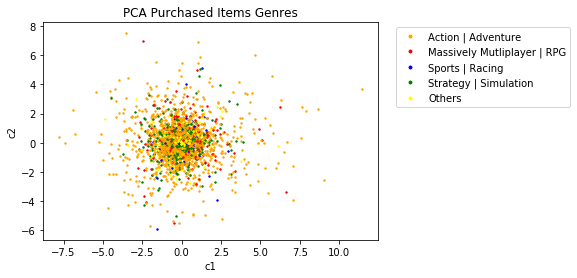

In [25]:
fig, ax = plt.subplots()
plotGenreItems(ax.scatter, purchased_itemGamma_pca, 'PCA Purchased Items Genres')

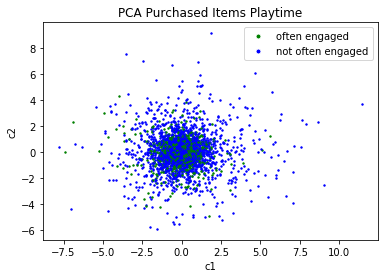

In [26]:
fig, ax = plt.subplots()
plotPlaytimeItems(ax.scatter, purchased_itemGamma_pca, 'PCA Purchased Items Playtime')

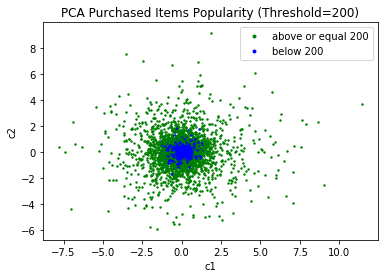

In [27]:
fig, ax = plt.subplots()
plotPopularityItems(ax.scatter, purchased_itemGamma_pca, THRESHOLD, 'PCA Purchased Items Popularity (Threshold={0})'.format(THRESHOLD))

In [28]:
pca.fit(played_itemGamma)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
pca.explained_variance_ratio_

array([0.17845729, 0.14354698])

In [30]:
played_itemGamma_pca = pca.transform(played_itemGamma)
played_itemGamma_pca.shape

(10978, 2)

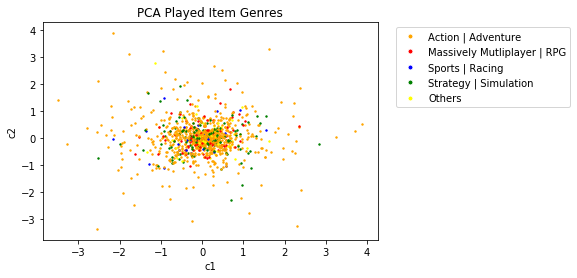

In [31]:
fig, ax = plt.subplots()
plotGenreItems(ax.scatter, played_itemGamma_pca, 'PCA Played Item Genres')

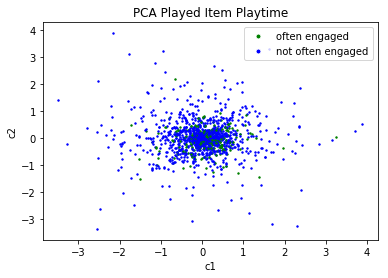

In [32]:
fig, ax = plt.subplots()
plotPlaytimeItems(ax.scatter, played_itemGamma_pca, 'PCA Played Item Playtime')

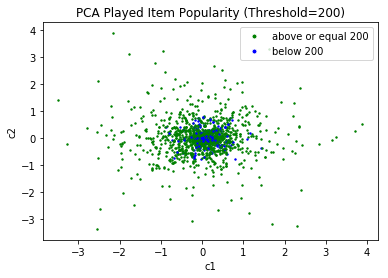

In [33]:
fig, ax = plt.subplots()
plotPopularityItems(ax.scatter, played_itemGamma_pca, THRESHOLD, 'PCA Played Item Popularity (Threshold={0})'.format(THRESHOLD))

In [34]:
tsne = TSNE(n_components=2, n_iter=5000)

In [35]:
purchased_itemGamma_tsne = tsne.fit_transform(purchased_itemGamma)

In [36]:
tsne.kl_divergence_

2.8081061840057373

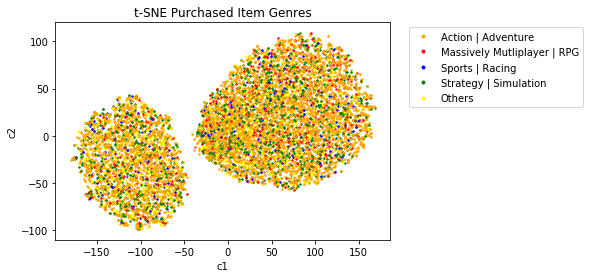

In [37]:
fig, ax = plt.subplots()
plotGenreItems(ax.scatter, purchased_itemGamma_tsne, 't-SNE Purchased Item Genres')

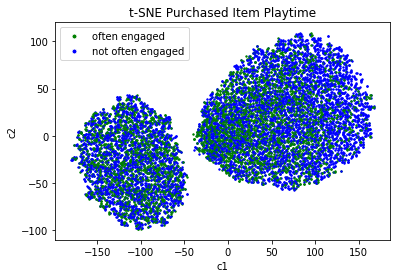

In [38]:
fig, ax = plt.subplots()
plotPlaytimeItems(ax.scatter, purchased_itemGamma_tsne, 't-SNE Purchased Item Playtime')

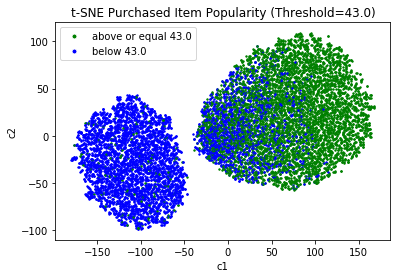

In [69]:
fig, ax = plt.subplots()
plotPopularityItems(ax.scatter, purchased_itemGamma_tsne, THRESHOLD, 't-SNE Purchased Item Popularity (Threshold={0})'.format(THRESHOLD))

In [40]:
played_itemGamma_tsne = tsne.fit_transform(played_itemGamma)

In [41]:
tsne.kl_divergence_

3.0009925365448

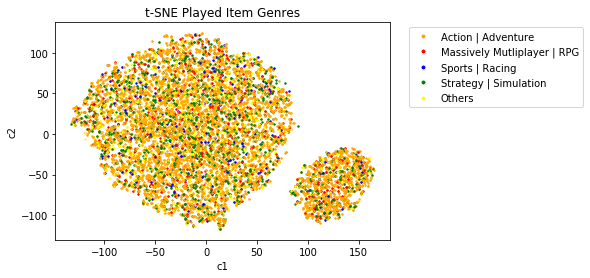

In [42]:
fig, ax = plt.subplots()
plotGenreItems(ax.scatter, played_itemGamma_tsne, 't-SNE Played Item Genres')

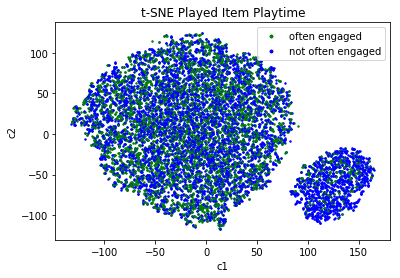

In [43]:
fig, ax = plt.subplots()
plotPlaytimeItems(ax.scatter, played_itemGamma_tsne, 't-SNE Played Item Playtime')

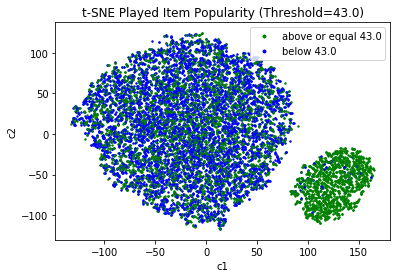

In [70]:
fig, ax = plt.subplots()
plotPopularityItems(ax.scatter, played_itemGamma_tsne, THRESHOLD, 't-SNE Played Item Popularity (Threshold={0})'.format(THRESHOLD))

In [45]:
# Bokeh Libraries
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, NumeralTickFormatter
from bokeh.models import HoverTool
from bokeh.layouts import layout 
pd.set_option('display.max_colwidth', 255)

In [46]:
genre_colors_labels = dict.fromkeys(['orange', 'red', 'blue', 'green', 'yellow'])
genre_colors_labels['blue'] = 'Sports | Racing'
genre_colors_labels['red'] = 'Massively Multiplayer | RPG'
genre_colors_labels['orange'] = 'Action | Adventure'
genre_colors_labels['green'] = 'Strategy | Simulation'
genre_colors_labels['yellow'] = 'Others'

In [47]:
engagement_colors_labels = {
    'green': 'Often Engaged',
    'blue': 'Not Often Engaged'
}
popularity_colors_labels = {
    'green': 'Above or Equal {0}'.format(THRESHOLD),
    'blue': 'Below {0}'.format(THRESHOLD)
}

In [48]:
def prepareDataFrame(itemGamma_dict, itemGamma_tsne):
    data = new_df.loc[list(itemGamma_dict.keys())]
    data['c1'] = itemGamma_tsne[:, 0]
    data['c2'] = itemGamma_tsne[:, 1]
    data['imgs'] = ['https://steamcdn-a.akamaihd.net/steam/apps/{0}/header.jpg'.format(x) for x in items]
    
    genres = data['genres']
    genre_colors = [getGenreColor(genre) for genre in genres]
    data['genre_color'] = genre_colors
    genre_labels = [genre_colors_labels[color] for color in genre_colors]
    data['genre_label'] = genre_labels
    
    averages = [0 if popularity == 0 else (total / popularity) for total, popularity in zip(data['total_playtime'], data['popularity'])]
    engagement_colors = [getEngagementColor(average, median) for average, median in zip(averages, data['median_playtime'])]
    data['engagement_color'] = engagement_colors
    engagement_labels = [engagement_colors_labels[color] for color in engagement_colors]
    data['engagement_label'] = engagement_labels
    
    popularities = data['popularity']
    popularity_colors = [getPopularityColor(popularity, THRESHOLD) for popularity in popularities]
    data['popularity_color'] = popularity_colors
    popularity_labels = [popularity_colors_labels[color] for color in popularity_colors]
    data['popularity_label'] = popularity_labels
    
    return data

In [49]:
purchased_data = prepareDataFrame(purchased_itemGamma_dict, purchased_itemGamma_tsne)

In [50]:
purchased_data

title  \
282010                                       Carmageddon Max Pack   
70                                                      Half-Life   
1640                               Disciples II: Gallean's Return   
1630                              Disciples II: Rise of the Elves   
2400                                       The Ship: Murder Party   
374970                                               Golf Masters   
3800                                                Advent Rising   
1520                                                       DEFCON   
2420                                      The Ship: Single Player   
4000                                                  Garry's Mod   
4230                                         RACE - The WTCC Game   
4900                                                Zen of Sudoku   
2520                                   Gumboy - Crazy Adventures™   
6200                                                Ghost Master®   
6210                                          Vegas: Make It Big™   
6300                               Dreamfall: The Longest Journey   
2990                                                   FlatOut 2™   
6220                                                      FlatOut   
6510                              Lost Planet™: Extreme Condition   
3980                                                CivCity: Rome   
1700                                                  Arx Fatalis   
6310                                          The Longest Journey   
3990                                   Civilization IV®: Warlords   
7610                                            Railroad Tycoon 3   
7600                                       Sid Meier's Railroads!   
7620                                  Railroad Tycoon II Platinum   
2540                                               RIP - Trilogy™   
7650                                  X-COM: Terror From the Deep   
8000                                     Tomb Raider: Anniversary   
6550                             Devil May Cry® 3 Special Edition   
...                                                           ...   
323950                                          French Indie Sale   
335590                                          Holiday Sale 2014   
349890                              Active Gaming advertising app   
358720                                 SteamVR Developer Hardware   
435380                                                   The Wake   
465240                              Serious Sam VR: The Last Hope   
469610               Rick and Morty Simulator: Virtual Rick-ality   
451430  Counter-Strike Nexon: Zombies - Teddy Nightmare (15 Days)   
7440                                              Big Kahuna Reef   
335930                                      Atavism 2 On Premises   
251590                                                  Soul Saga   
7420                                   Wik and the Fable of Souls   
220980                                                  CRYENGINE   
434600                                                  Blue Bird   
504360                                     Rage of the Battlemage   
513230                                        The Underground Man   
24620                                   Trainz Classics: Volume 3   
8620                                       Attack on Pearl Harbor   
6340                           Age of Conan - Hyborian Adventures   
420630                             MAGIX Music Maker 2016 Premium   
35470                                               The Ball Beta   
29530                              Lineage II: The Chaotic Throne   
461950                                                   Beat Cop   
24820                                               The Godfather   
7980                                  Soldier of Fortune: Payback   
316460                                    Web Designer 10 Premium   
10590                                Football Manager 2009

In [51]:
played_data = prepareDataFrame(played_itemGamma_dict, played_itemGamma_tsne)

In [52]:
played_data

title  \
282010                                       Carmageddon Max Pack   
70                                                      Half-Life   
1640                               Disciples II: Gallean's Return   
1630                              Disciples II: Rise of the Elves   
2400                                       The Ship: Murder Party   
374970                                               Golf Masters   
3800                                                Advent Rising   
1520                                                       DEFCON   
2420                                      The Ship: Single Player   
4000                                                  Garry's Mod   
4230                                         RACE - The WTCC Game   
4900                                                Zen of Sudoku   
2520                                   Gumboy - Crazy Adventures™   
6200                                                Ghost Master®   
6210                                          Vegas: Make It Big™   
6300                               Dreamfall: The Longest Journey   
2990                                                   FlatOut 2™   
6220                                                      FlatOut   
6510                              Lost Planet™: Extreme Condition   
3980                                                CivCity: Rome   
1700                                                  Arx Fatalis   
6310                                          The Longest Journey   
3990                                   Civilization IV®: Warlords   
7610                                            Railroad Tycoon 3   
7600                                       Sid Meier's Railroads!   
7620                                  Railroad Tycoon II Platinum   
2540                                               RIP - Trilogy™   
7650                                  X-COM: Terror From the Deep   
8000                                     Tomb Raider: Anniversary   
6550                             Devil May Cry® 3 Special Edition   
...                                                           ...   
323950                                          French Indie Sale   
335590                                          Holiday Sale 2014   
349890                              Active Gaming advertising app   
358720                                 SteamVR Developer Hardware   
435380                                                   The Wake   
465240                              Serious Sam VR: The Last Hope   
469610               Rick and Morty Simulator: Virtual Rick-ality   
451430  Counter-Strike Nexon: Zombies - Teddy Nightmare (15 Days)   
7440                                              Big Kahuna Reef   
335930                                      Atavism 2 On Premises   
251590                                                  Soul Saga   
7420                                   Wik and the Fable of Souls   
220980                                                  CRYENGINE   
434600                                                  Blue Bird   
504360                                     Rage of the Battlemage   
513230                                        The Underground Man   
24620                                   Trainz Classics: Volume 3   
8620                                       Attack on Pearl Harbor   
6340                           Age of Conan - Hyborian Adventures   
420630                             MAGIX Music Maker 2016 Premium   
35470                                               The Ball Beta   
29530                              Lineage II: The Chaotic Throne   
461950                                                   Beat Cop   
24820                                               The Godfather   
7980                                  Soldier of Fortune: Payback   
316460                                    Web Designer 10 Premium   
10590                                Football Manager 2009

In [53]:
# Output to notebook
output_notebook()

Loading BokehJS ...

In [60]:
def plotInteractiveGraph(data, objective, category):
    # Store the data in a ColumnDataSource
    items_cds = ColumnDataSource(data)

    # Specify the selection tools to be made available
    select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'crosshair', 'hover',
                    'reset', 'zoom_in', 'zoom_out', 'save', 'redo', 'undo']

    # Create the figure
    fig = figure(plot_height=600,
                 plot_width=1000,
                 x_axis_label='Component 1',
                 y_axis_label='Component 2',
                 title='t-SNE Latent Space Visualization (10978 items with {0} objective)'.format(objective),
                 toolbar_location='below',
                 tools=select_tools)


    color = '{0}_color'.format(category)
    label = '{0}_label'.format(category)
    # Add square representing each player
    fig.circle(x='c1',
               y='c2',
               radius=1,
               source=items_cds,
               color=color,
               legend=label,
               selection_color='crimson',
               nonselection_color='lightgray',
               nonselection_alpha=0.3)

    new_legend = fig.legend[0]
    fig.legend[0].plot = None
    fig.add_layout(new_legend, 'right')

    # Custome Hover Tooltips
    TOOLTIPS = """
        <div>
            <div>
                <img
                    src="@imgs" height="45" alt="@imgs" width="45"
                    style="float: left; margin: 5px 5px 2px 2px;"
                    border="2"
                ></img>
            </div>
            <div>
                <span style="font-size: 10px; font-weight: bold;">@title</span>
            </div>
            <div>
                <span style="font-size: 8px;">Popularity</span>
                <span style="font-size: 8px; color: #966;">@popularity</span>
            </div>
            <div>
                <span style="font-size: 8px;">Genres</span>
                <span style="font-size: 8px; color: #966;">@genres</span>
            </div>
            <div>
                <span style="font-size: 8px;">Location</span>
                <span style="font-size: 8px; color: #696;">($x, $y)</span>
            </div>
        </div>
    """

    # Add the HoverTool to the figure
    fig.add_tools(HoverTool(tooltips=TOOLTIPS, anchor='bottom_right', point_policy='snap_to_data'))

    # Visualize
    show(fig, notebook_handle=True)

In [61]:
plotInteractiveGraph(purchased_data, 'purchased', 'genre')

In [64]:
plotInteractiveGraph(purchased_data, 'purchased', 'popularity')

In [62]:
plotInteractiveGraph(played_data, 'played', 'genre')